### Hotmart Technical Case: Analysis about Sales Recovery

In **this notebook** I intend use the queries built with SQL for details analysis, generate insights and recomentations.

**Color palette**:
*   <span style="background-color:#EF4E23; padding: 0.5em; display: inline-block;"></span> Orange: #EF4E23
*   <span style="background-color:#053D4D; padding: 0.5em; display: inline-block;"></span> Dark Blue: #053D4D
*   <span style="background-color:#ECEBEB; padding: 0.5em; display: inline-block;"></span> Ice: #ECEBEB
*   <span style="background-color:#8CA4AC; padding: 0.5em; display: inline-block;"></span> Dark Gray: #8CA4AC
*   <span style="background-color:#BCCCD4; padding: 0.5em; display: inline-block;"></span> Light Gray: #BCCCD4



#### 0. Development setup

In [1]:
import pandas as pd
from sqlalchemy import create_engine, text
from datetime import date as dt
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns

Loading file sales.db, this file is database with tables already data cleaning and validation

In [2]:
# Load db in pthon
path_db = '../../data/sales.db'
# Creating engine sqlite
engine = create_engine(f"sqlite:///{path_db}")   

Fucntion with propose of through the SQL file execute query and make create of dataframe using pandas

In [4]:
# Function execute query

def query_execute(path_query):
    # Open file with query
    path_query = path_query

    with open(path_query, 'r') as file:
        query_from_file = file.read()

    # Generate analysis from query content
    with engine.connect() as conn:
        df = pd.read_sql_query(text(query_from_file), conn)

    return df

Functions for charts generate

In [10]:
def chart_barh(df_y, df_x, title_name, y_label, x_label, color='#EF4E23'):
    fig, ax = plt.subplots(figsize=(10,5))

    y = df_y
    x = df_x.head(5)
    # Chart with horizontal bars
    hbars = ax.barh(y, x, color=color)

    ax.set_xlabel(x_label)   # label axis x
    ax.set_ylabel(y_label)   # label axis y
    ax.invert_yaxis()        # invert products orders
    ax.set_title(title_name) # title

    # rotules
    ax.bar_label(hbars)
    #borda
    plt.tight_layout()
    plt.show()

def chart_barv(df_x, df_y, title_name, y_label, x_label, color='#EF4E23'):
    fig, ax = plt.subplots(figsize=(10,5))

    x = df_x
    y = df_y
    # Chart with horizontal bars
    vbars = ax.bar(x, y, color=color)

    ax.set_xlabel(x_label)   # label axis x
    ax.set_ylabel(y_label)   # label axis y
    ax.set_title(title_name) # title

    # rotules
    ax.bar_label(vbars)
    #borda
    plt.tight_layout()
    plt.show()

#### Pre-Work

In [26]:
df_complete_table = query_execute('../analysis/complete_table.sql')
display(df_complete_table)

,purchase_id,purchase_date,product_id,product_price,service_tax,comission_value,has_coupon,discount,refund,cancelled,...,registry_date,recovery_active,member_area_active,deletion_date,niche,base_price,type,producer_id,registry_date,country
0,696733696,2022-06-21,275653577,48.0,7.2,36.0,1,0.1,0,0,...,2020-01-29,0,0,None,Artes e Design,48.0,Ebook,10,2020-01-12,BRASIL
1,957560528,2021-01-02,399974968,45.0,4.5,40.5,0,0.0,1,0,...,2018-05-21,0,0,None,Tecnologia e Inovação,45.0,Ebook,1,2018-02-01,BRASIL
2,800828744,2020-07-07,489748266,1000.0,100.0,900.0,0,0.0,0,0,...,2018-10-30,1,1,None,Marketing,1000.0,Assinatura,1,2018-02-01,BRASIL
3,964632300,2022-11-24,545252229,210.0,21.0,168.0,1,0.1,0,0,...,2022-09-14,0,0,None,Educação Infantil,210.0,Curso,4,2021-01-02,COLOMBIA
4,830193347,2021-09-05,489748266,1000.0,100.0,900.0,0,0.0,0,0,...,2018-10-30,1,1,None,Marketing,1000.0,Assinatura,1,2018-02-01,BRASIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10661,289956962,2020-04-04,399974968,45.0,5.4,39.6,0,0.0,0,0,...,2018-05-21,0,0,None,Tecnologia e Inovação,45.0,Ebook,1,2018-02-01,BRASIL
10662,788921762,2021-01-03,489748266,1000.0,100.0,900.0,0,0.0,0,0,...,2018-10-30,1,1,None,Marketing,1000.0,Assinatura,1,2018-02-01,BRASIL
10663,345494529,2022-02-04,264261718,560.0,56.0,504.0,0,0.0,0,0,...,2021-04-24,1,0,None,Financas,560.0,Curso,8,2019-01-11,BRASIL
10664,199287415,2022-09-30,399974968,45.0,4.5,36.0,1,0.1,0,1,...,2018-05-21,0,0,None,Tecnologia e Inovação,45.0,Ebook,1,2018-02-01,BRASIL


In [27]:
df_complete_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10666 entries, 0 to 10665
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   purchase_id         10666 non-null  int64  
 1   purchase_date       10666 non-null  object 
 2   product_id          10666 non-null  int64  
 3   product_price       10666 non-null  float64
 4   service_tax         10666 non-null  float64
 5   comission_value     10666 non-null  float64
 6   has_coupon          10666 non-null  int64  
 7   discount            10666 non-null  float64
 8   refund              10666 non-null  int64  
 9   cancelled           10666 non-null  int64  
 10  chargeback          10666 non-null  int64  
 11  product_id          10666 non-null  int64  
 12  producer_id         10666 non-null  int64  
 13  registry_date       10666 non-null  object 
 14  recovery_active     10666 non-null  int64  
 15  member_area_active  10666 non-null  int64  
 16  dele

In [28]:
df_complete_table.describe().T

,count,mean,std,min,25%,50%,75%,max
purchase_id,10666.0,5.761821e+08,2.351589e+08,168168299.0,3.722836e+08,577322686.0,777877384.0,986867362.0
product_id,10666.0,5.126968e+08,2.395417e+08,218834610.0,3.434116e+08,399974968.0,719732475.0,983844542.0
product_price,10666.0,5.112265e+02,5.283548e+02,30.0,4.800000e+01,390.0,950.0,1984.0
service_tax,10666.0,5.682606e+01,5.992343e+01,3.0,5.400000e+00,39.0,100.0,297.6
comission_value,10666.0,4.231427e+02,4.413923e+02,16.5,4.050000e+01,324.8,720.0,1785.6
has_coupon,10666.0,4.028689e-01,4.904978e-01,0.0,0.000000e+00,0.0,1.0,1.0
discount,10666.0,6.069754e-02,8.522572e-02,0.0,0.000000e+00,0.0,0.1,0.3
refund,10666.0,7.734858e-02,2.671563e-01,0.0,0.000000e+00,0.0,0.0,1.0
cancelled,10666.0,1.136321e-01,3.173788e-01,0.0,0.000000e+00,0.0,0.0,1.0
chargeback,10666.0,5.212826e-02,2.222961e-01,0.0,0.000000e+00,0.0,0.0,1.0


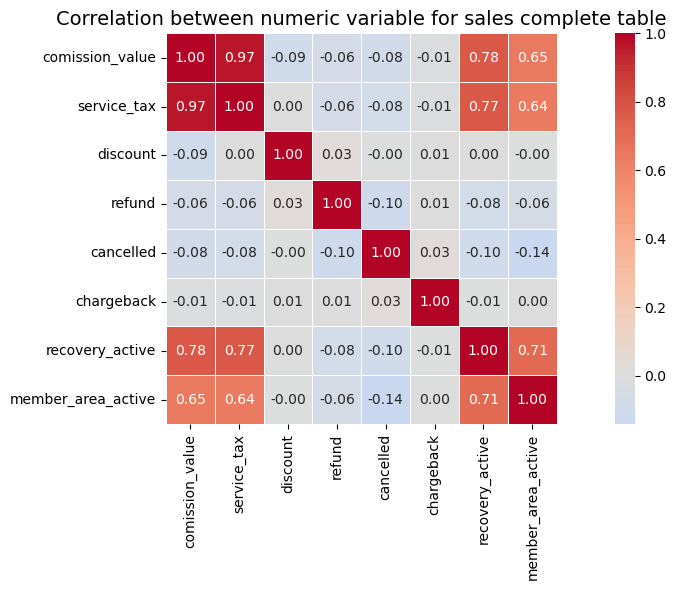

In [38]:
matrix_corr = df_complete_table[['comission_value', 'service_tax', 'discount', 'refund', 'cancelled', 'chargeback', 'recovery_active', 'member_area_active']].corr()

plt.figure(figsize=(12, 6))

sns.heatmap(
    matrix_corr,
    annot=True,     
    fmt='.2f',
    cmap='coolwarm',
    linewidths=.5,
    center=0,
    cbar=True,
    square=True
)

plt.title('Correlation between numeric variable for sales complete table', fontsize=14)

plt.tight_layout()
plt.show()


**Insights**: There are correlation between:
- member_are_active and recovery_active: It indicated member_are_active equals true, there are more products using recovery_active
- member_are_active and commission_value:  It indicated member_are_active equals true, there is tendency to increase comission_value
- recovery_active and commission_value: Make sense, because the last insights above

#### 1. Analysis of Products

In [6]:
df_products = query_execute('../analysis/1_top_products_sales.sql')
display(df_products)

,product_id,niche,qtd_vendas
0,983844542,Empreendedorismo,331
1,719732475,Tecnologia e Inovação,169
2,260868848,Saúde e Alimentação,148
3,324917616,Viagens,92
4,348532296,Financas,49


In [8]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  5 non-null      int64 
 1   niche       5 non-null      object
 2   qtd_vendas  5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 252.0+ bytes


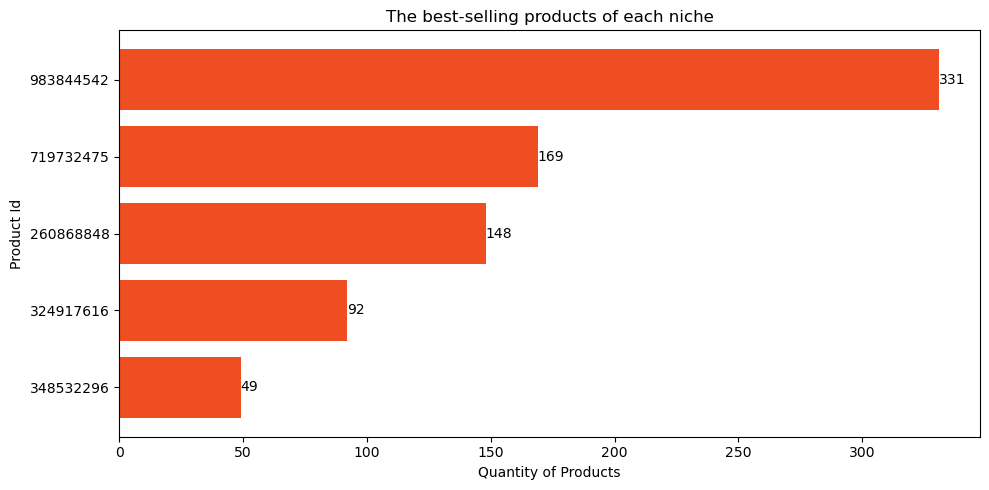

In [9]:
chart_barh(
    df_products['product_id'].astype(str), 
    df_products['qtd_vendas'],
    'The best-selling products of each niche',
    'Product Id',
    'Quantity of Products'
)

**Insights**: It was possible to check best-selling products of each niche, the niche Entrepreneurship and Inovation & Technologies is better then other categories, this tendency can be a strong start point for to prioritize action in the future.

#### 2. Analysis of Producers

In [14]:
df_producers = query_execute('../analysis/2_top_producer.sql')
display(df_producers)

,producer_id,country,total_commission
0,13,BRASIL,1458139
1,3,BRASIL,292171
2,6,MEXICO,262550
3,7,BRASIL,128060
4,5,BRASIL,45328


In [15]:
df_producers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   producer_id       5 non-null      int64 
 1   country           5 non-null      object
 2   total_commission  5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 252.0+ bytes


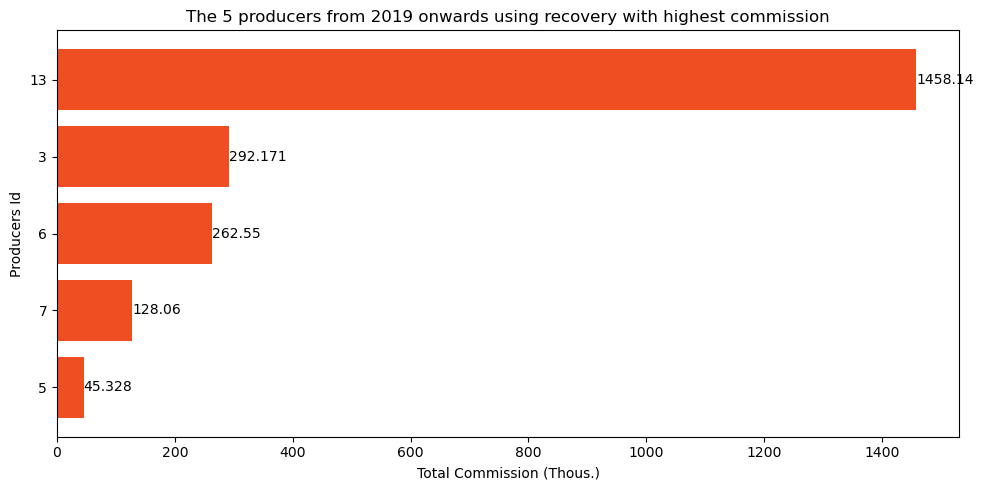

In [12]:
chart_barh(
    df_producers['producer_id'].astype(str), 
    df_producers['total_commission']/1000, 
    'The 5 producers from 2019 onwards using recovery with highest commission', 
    'Producers Id', 
    'Total Commission (Thous.)'
)

**Insights**: It is possible to observe the largest producer (13) well above the others with 1,458,139 sales, against the second with 292,171 sales. This is it indicate that strategies this producer is working very well, it should be interesting to analyze with more details what are reason, and to try replicate some actions all producers.

#### 3. Analysis of Week Sales

In [17]:
df_sales_week = query_execute('../analysis/3_sales_per_week.sql')
display(df_sales_week)

,year,desc_weekday,previous_sales,currently_sales,variation_sales
0,2020,Sunday,NaN,331,NaN
1,2021,Sunday,331.0,377,12.20
2,2022,Sunday,377.0,428,11.92
3,2020,Monday,NaN,203,NaN
4,2021,Monday,203.0,238,14.71
5,2022,Monday,238.0,314,24.20
6,2020,Tuesday,NaN,211,NaN
7,2021,Tuesday,211.0,198,-6.57
8,2022,Tuesday,198.0,345,42.61
9,2020,Wednesday,NaN,157,NaN


In [18]:
df_sales_week.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             21 non-null     int64  
 1   desc_weekday     21 non-null     object 
 2   previous_sales   14 non-null     float64
 3   currently_sales  21 non-null     int64  
 4   variation_sales  14 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 972.0+ bytes


Plot stacked bars to analyze sales on the time

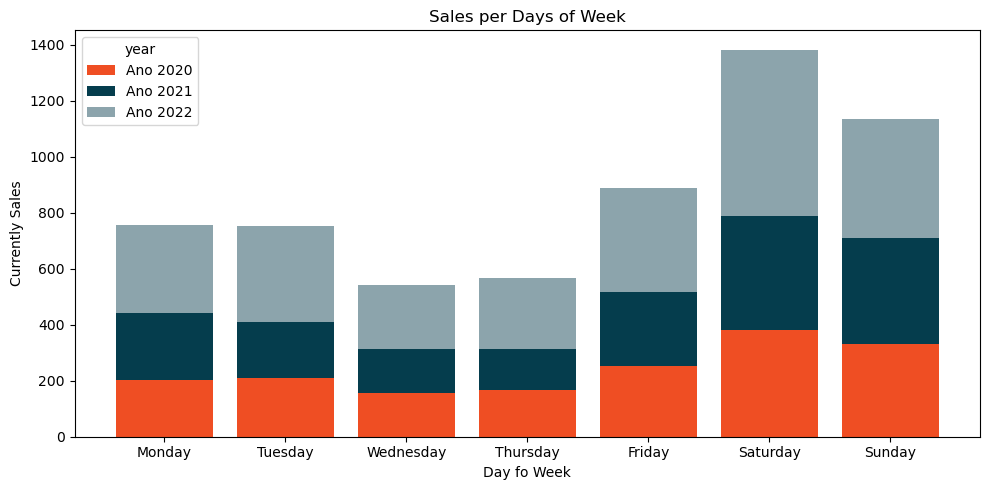

In [ ]:
df_pivot = df_sales_week.pivot(index="desc_weekday", columns="year", values="currently_sales").fillna(0)
df_pivot = df_pivot.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])  # Ordenação dos dias

fig, ax = plt.subplots(figsize=(10, 5))
bottom = np.zeros(len(df_pivot))  # initial base zero
colors = {2020: "#EF4E23", 2021: "#053D4D", 2022: "#8CA4AC"}  # year collors

for year in [2020, 2021, 2022]:
    ax.bar(df_pivot.index, df_pivot[year], bottom=bottom, label=f"Ano {year}", color=colors[year])
    bottom += df_pivot[year]  # Update the base to stacked corretly

ax.set_xlabel('Day fo Week')
ax.set_ylabel('Currently Sales')
ax.set_title('Sales per Days of Week')
ax.legend(title='year')

fig.tight_layout()
plt.show()

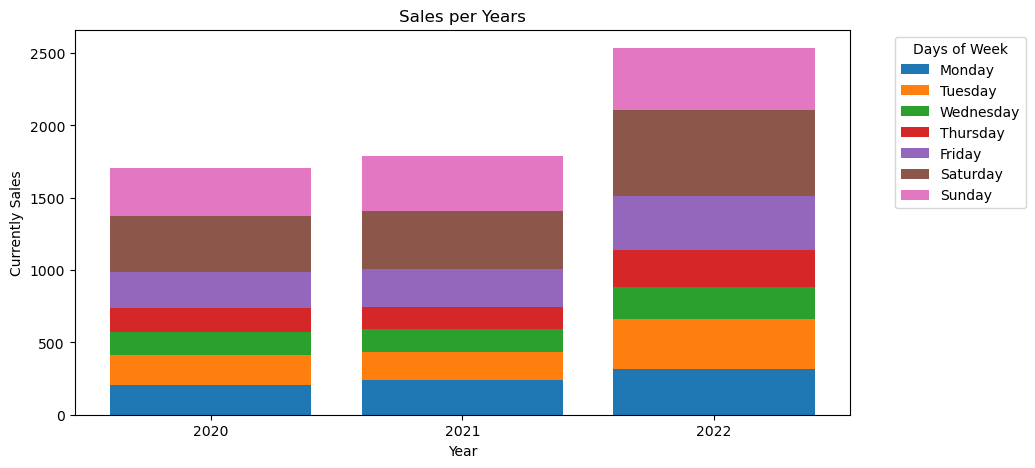

In [41]:
df_pivot = df_sales_week.pivot(index="year", columns="desc_weekday", values="currently_sales").fillna(0)

fig, ax = plt.subplots(figsize=(10, 5))
bottom = np.zeros(len(df_pivot))

for day in ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]:
    ax.bar(df_pivot.index.astype(str), df_pivot[day], bottom=bottom, label=day)
    bottom += df_pivot[day]

ax.set_ylabel('Currently Sales')
ax.set_xlabel("Year")
ax.set_title("Sales per Years")
ax.legend(title="Days of Week", bbox_to_anchor=(1.05, 1), loc='upper left')

# Exibir o gráfico
plt.show()

**Insights**: It's possible verify Saturday and Sunday like the best days of week in the three years analyzed, this can indicate more no completed sales rate, therefore I should recommend to increase or to improve the support operation in this days.
Futhermore, In general, there were evaluate on the time, except in variation: Tuesday (2021/2020) with -6.57 and  Thursday (2021/2020) with -11.41.

#### 4. Analysis Loss Performance

In [21]:
df_loss = query_execute('../analysis/4_loss_performance.sql')
display(df_loss)

,country,refund,cancelled,qtd_vendas,loss_performance
0,MEXICO,14,6,218,10.90
1,EUA,3,6,72,8.00
2,BRASIL,154,223,2801,7.43
3,COLOMBIA,59,86,721,4.97


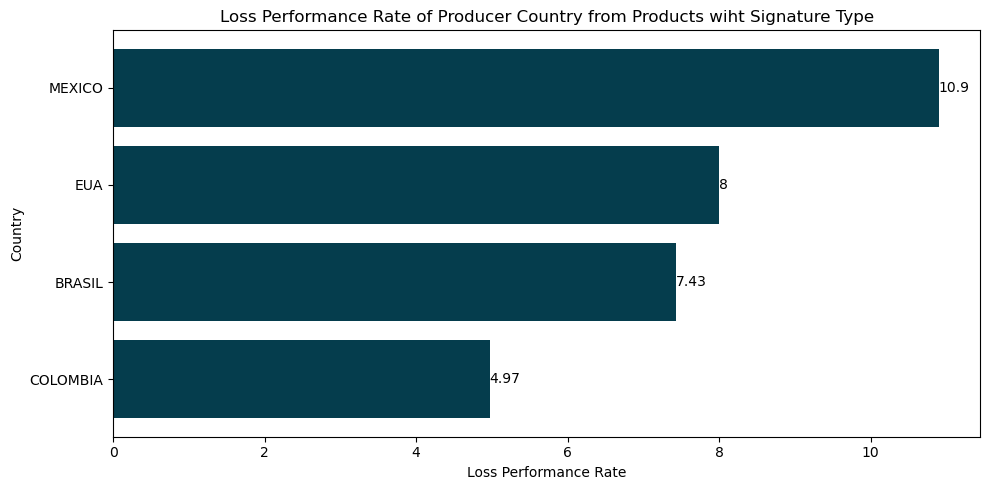

In [22]:
chart_barh(
    df_loss['country'].astype(str), 
    df_loss['loss_performance'], 
    'Loss Performance Rate of Producer Country from Products wiht Signature Type', 
    'Country', 
    'Loss Performance Rate',
    '#053D4D'
)

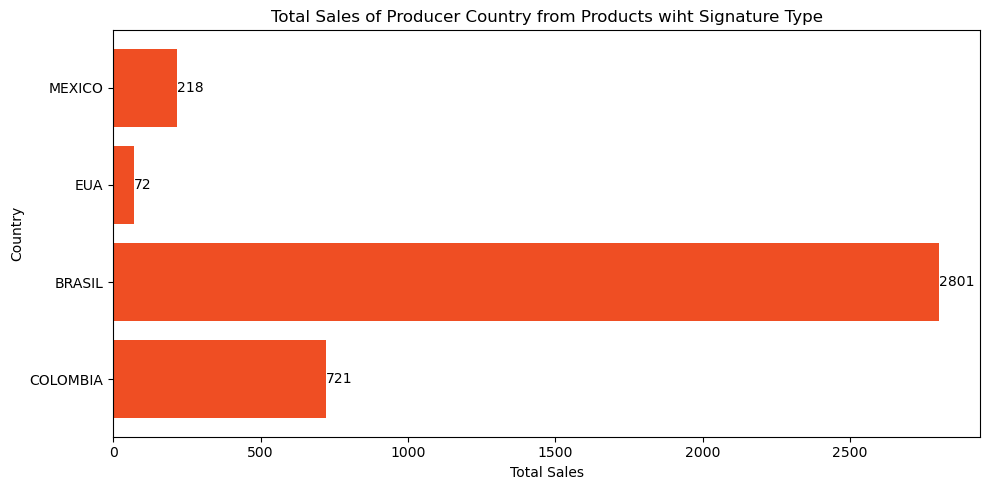

In [23]:
chart_barh(
    df_loss['country'].astype(str), 
    df_loss['qtd_vendas'], 
    'Total Sales of Producer Country from Products wiht Signature Type', 
    'Country', 
    'Total Sales',
    '#EF4E23'
)

**Insights**: It's possible verify in this case, how much bigger is sales quantity, smaller is Loss Performance Rate, that it is the metrics (cancelations+refunds)/total_sales, so I understand that of payment models or other process in Brazil and Colombia is working better than Mexico and USA. I think can be consumption patterns related with region, because the most of sales are in South American countries, while other countries are localized in North American. My recomendation is trying better the comsuption patterns in North American Countries, with propose to analyze if there are some different habits the people this countries.

#### 5. Retention Commission

In [ ]:
df_retention = query_execute('../analysis/5_retention.sql')
display(df_retention)

,product_id,niche,recovery_active,comission_received,total_comission,average_commission_retention
0,218834610,Marketing,1,223743.00,258523.20,86.55
1,328762963,Saúde e Alimentação,1,20623.20,24226.80,85.13
2,466262361,Empreendedorismo,1,31840.00,38864.00,81.93
3,264261718,Financas,1,17052.00,21352.80,79.86
4,844949729,Empreendedorismo,1,41246.40,51866.10,79.52
5,348532296,Financas,1,28328.80,35700.00,79.35
6,903828613,Financas,1,4531.20,6006.20,75.44
7,719732475,Tecnologia e Inovação,1,274922.88,364897.28,75.34
8,545252229,Educação Infantil,0,20500.20,28847.70,71.06


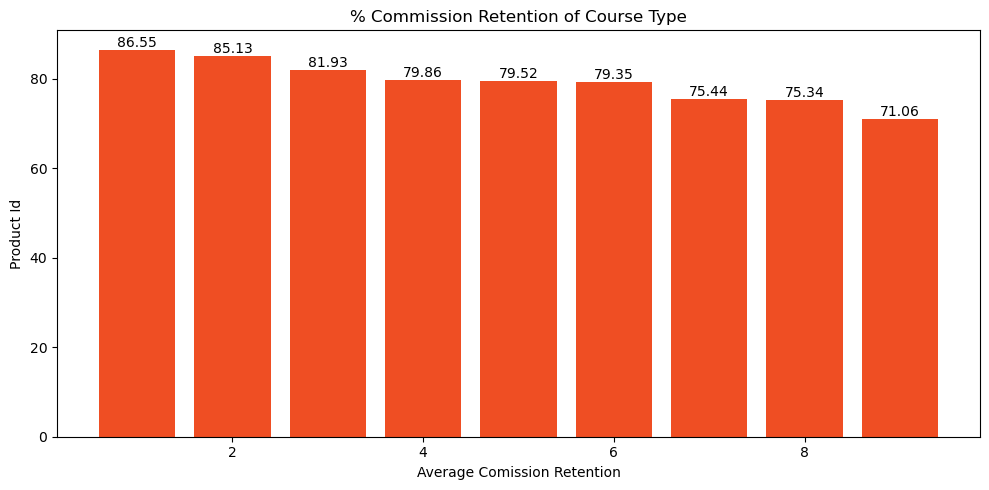

In [46]:
chart_barv(
    df_retention.index + 1, 
    df_retention['average_commission_retention'], 
    '% Commission Retention of Course Type', 
    'Product Id', 
    'Average Comission Retention'
)

**Insights**: There're difference for product performance consididering products with the recovery tool activated, because all products listed. The retention smarllest was unique porduct without recovery tool activated, this reinforces use of tools, because there're less events with sales no completed. Besides of, there is a duality, in that, the best commission retention had the second position of total commission, and the biggest in total commission had the second worst position of commission retention. Possibly there are something to harm product sales performance.

#### 6. Analysis of Producers Part. 2

In [40]:
df_producers2 = query_execute('../analysis/6_top_producer2.sql')
display(df_producers2.head(10))

,producer_id,country,member_active_rate,avg_order_value,discount_rate,recency,not_completed_sales_rate,frequency,revenue_expected
0,13,BRASIL,68.91,1602.64,6.16,784,14.18,1100,1762908.0
1,1,BRASIL,43.59,437.73,6.16,784,16.76,3742,1637995.0
2,4,COLOMBIA,9.58,523.54,5.92,784,22.82,793,415170.0
3,3,BRASIL,0.00,291.41,6.16,741,21.84,1346,392236.0
4,6,MEXICO,40.20,486.51,5.62,784,18.58,689,335204.0
5,2,COLOMBIA,31.27,478.81,6.27,784,21.02,566,271008.0
6,7,BRASIL,0.00,346.77,5.13,784,22.41,638,221240.0
7,8,BRASIL,0.00,352.46,7.31,784,25.85,557,196323.0
8,14,COLOMBIA,17.61,120.89,7.05,784,22.20,545,65886.0
9,10,BRASIL,0.00,142.35,5.47,784,20.85,422,60072.0


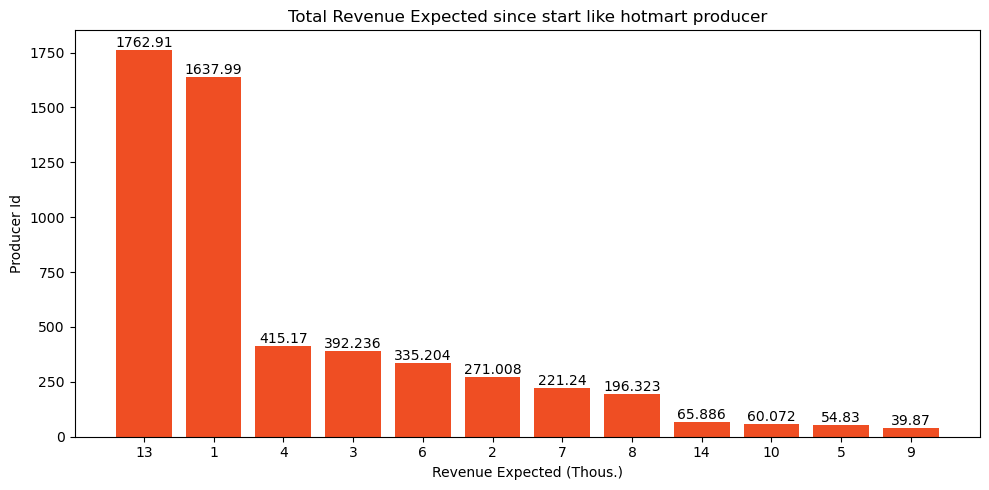

In [41]:
chart_barv(
    df_producers2['producer_id'].astype(str), 
    df_producers2['revenue_expected']/1000, 
    'Total Revenue Expected since start like hotmart producer', 
    'Producer Id', 
    'Revenue Expected (Thous.)'
)

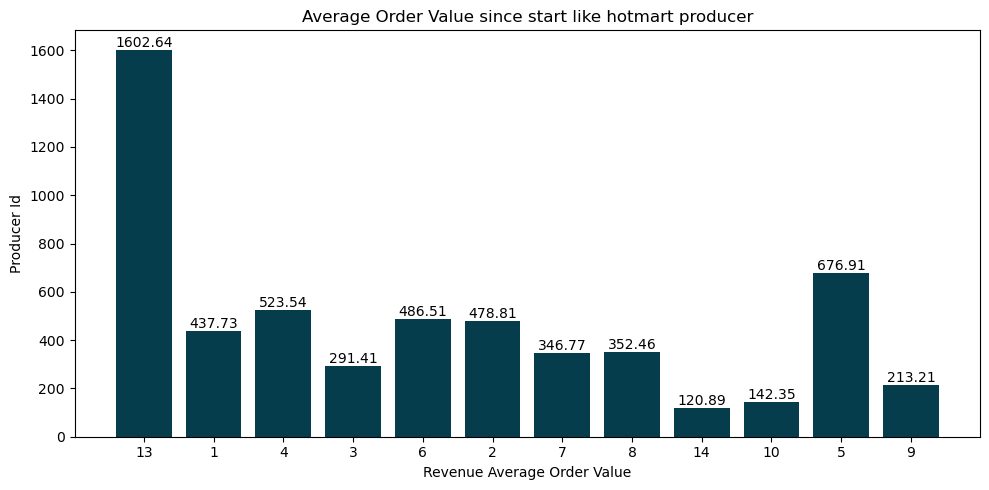

In [42]:
chart_barv(
    df_producers2['producer_id'].astype(str), 
    df_producers2['avg_order_value'], 
    'Average Order Value since start like hotmart producer', 
    'Producer Id', 
    'Revenue Average Order Value',
    '#053D4D'
)

**Insights**: I think mainly analyze RFV, that R is recency (days since last sale), F is frequency (volumetry of sales in period determinate) and V (it was considering revune expected, tha is, total revenue desconsidering sales not completed). For Revenue Expected metric was chosen, because I shoud want analyse the potencial of producers together Sales Not Completed Rate. How this is it, I could analyze if there were producers sold well, but it were missing very much sales. Although, the best producer in meddle had lowest rate of sales not completed. For secundary metrics I placed three, it is:  

Other point, I Try analyze only year 2023, but member_active_rate, avg_order_value e discount_rate. I chosen this metrics, because for me it's importante verify if correlation between with principal metrics. After analyze, concludes discount_rate metrics is simillar with all producers (it's standard discounts), already member_active_rate and avg_order_value for the best producer (first position) is bigger than other, but in some cases it don't correlation with revenue or frquency, like producer 3, that is on 4th position and he don't have someone with member, and onw 3th worst position with KPI avg_order_value.